In [1]:
import numpy as np
import os
import numpy as np
import uncertainties as u
from uncertainties import ufloat
from uncertainties.umath import sqrt
from uncertainties.umath import __all__
from uncertainties.umath import *
import uncertainties.unumpy as unp
import scipy.constants
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas # pip install Jinja2
import pint # pip install pint OR conda install pint
units = pint.UnitRegistry()
units.default_format = '~'
import warnings
warnings.simplefilter("ignore")
cm = 1/2.54

CIRCLE_DEG = 360.0
CIRCLE_RAD = 2*scipy.constants.pi
HALF_CIRCLE_RAD = scipy.constants.pi
DEG_PER_RAD = CIRCLE_DEG / CIRCLE_RAD

def r2d(x):
    return x*DEG_PER_RAD

def extr_values(np_arr):
    return unp.nominal_values(np_arr)

def extr_sig(np_arr):
    return unp.std_devs(np_arr)

def errorbar_plot_with_linregress(X, Y, SIG_Y, errbarlabel='errbarlabel', xlabel='xlabel', ylabel='ylabel', errbarcolor='blue', linfitlabel='linfitlabel', nolinregress=False, saveas='tmp.png'):
    result = scipy.stats.linregress(X, Y)
    #slope, intercept, rvalue, pvalue, sevalue, inteerr
    print("slope: ", result.slope)
    print("slope_err:", result.stderr)
    print("intercept: ", result.intercept)
    x_axis_spaced = np.linspace(np.min(X), np.max(X), 10)
    fig, ax = plt.subplots(1,1,figsize=(8*cm, 8*cm))
    #ax.plot(x,y,linestyle='-', color='red')
    if not nolinregress:
        ax.plot(x_axis_spaced, result.slope*x_axis_spaced + result.intercept, 'r--', label=linfitlabel)
    ax.errorbar(X, Y, yerr=SIG_Y, linestyle='-', color=errbarcolor, capsize=3, label=errbarlabel)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    #ax.set_xlim([-1,1])
    #ax.set_ylim([-4,4])
    ax.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig(saveas, dpi=500)
    plt.show()
    if not nolinregress:
        return u.ufloat(result.slope, result.stderr), u.ufloat(result.intercept, result.intercept_stderr) # (slope+=unc), (intercept+=unc)

slope:  0.5591428571428572
slope_err: 0.18855605997978966
intercept:  6815.142857142857


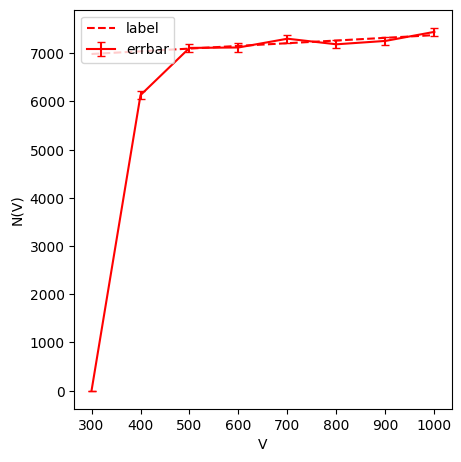

(0.5591428571428572+/-0.18855605997978966,
 6815.142857142857+/-145.03707947200505)

In [2]:
# Import meas 1
V_volt_meas, t_seconds_meas, N_of_V_meas = np.genfromtxt(os.path.join(os.getcwd(), "meas_1.csv"), delimiter=',', skip_header=1, unpack=True)

u_V = np.array([u.ufloat(V_val, 5.0) for V_val in V_volt_meas])
u_t = np.array([u.ufloat(t_val, 2.0/1000) for t_val in t_seconds_meas])
u_N = np.array([u.ufloat(N_val, np.sqrt(N_val)) for N_val in N_of_V_meas])

def graph_N(V, N, sig_N):
    X, Y = V[2:], N[2:]
    result = scipy.stats.linregress(X, Y)
    #slope, intercept, rvalue, pvalue, sevalue, inteerr
    print("slope: ", result.slope)
    print("slope_err:", result.stderr)
    print("intercept: ", result.intercept)
    x_axis_spaced = np.linspace(np.min(V), np.max(V), 10)
    fig, ax = plt.subplots(1,1,figsize=(12*cm, 12*cm))
    #ax.plot(x,y,linestyle='-', color='red')
    ax.plot(x_axis_spaced, result.slope*x_axis_spaced + result.intercept, 'r--', label='label')
    ax.errorbar(V, N, yerr=sig_N, linestyle='-', color='red', capsize=3, label='errbar')
    ax.set_xlabel('V')
    ax.set_ylabel('N(V)')
    ax.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('N_of_V', dpi=500)
    plt.show()
    return u.ufloat(result.slope, result.stderr), u.ufloat(result.intercept, result.intercept_stderr) # (slope+=unc), (intercept+=unc)

graph_N(extr_values(u_V), extr_values(u_N), extr_sig(u_N))

In [4]:
# 2. Aktivität der Quelle
u_t = u.ufloat(120, 2/1000) # s
u_N2 = u.ufloat(9688, np.sqrt(9688)) # Einfallende Teilchen in der Zeit t
u_N_bg = u.ufloat(74, np.sqrt(74))
u_N_eff = u_N2 - u_N_bg

# Raumwinkelberechnung
u_D = u.ufloat(17.2, 0.5) # mm
u_r = u_D/2 # mm
u_d = u.ufloat(101, 0.5) # mm
u_theta = u.wrap(np.arctan)(u_r/u_d) # rad

u_epsilon = u.wrap(np.square)(u.wrap(np.sin)(u_theta/2))

# Aktivität
u_Aktivitaet = u_N_eff / (u_t * u_epsilon)

u_Aktivitaet

44440.86061637556+/-2646.51782601156

In [6]:
reach_Sr = 0.45
not_reach_Sr = 1 - reach_Sr
reach_Y = 0.9
not_reach_Y = 1 - reach_Y

rate_Sr = 0.5
rate_Y = 0.5

fact = 1/(rate_Sr * reach_Sr + rate_Y * reach_Y)
fact

u_Aktivitaet_Corrected = fact * u_Aktivitaet

1.4814814814814814